   #                              The Spark Foundation
##                                 Prediction using Supervised ML
## Task 1: Predict the percentage of an student based on the no. of study hours.


In [20]:
#Importing Basic Libraries that will be required throughout the project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
#Reading the csv file in df variable and printing out first 10 rows using head method
#df = pd.read_csv('http://bit.ly/w-data')
# We can use both But I Love to use download csv file and read
df=pd.read_csv("student_scores - student_scores.csv")
df.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [22]:
#bmi body mass index
df.dtypes

Hours     float64
Scores      int64
dtype: object

In [23]:
# Check if there any null value in the Dataset
df.isnull == True

False

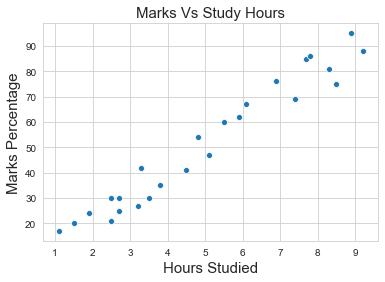

In [24]:
sns.set_style('whitegrid')
sns.scatterplot(y= df['Scores'], x= df['Hours'])
plt.title('Marks Vs Study Hours',size=15)
plt.ylabel('Marks Percentage', size=15)
plt.xlabel('Hours Studied', size=15)
plt.show()

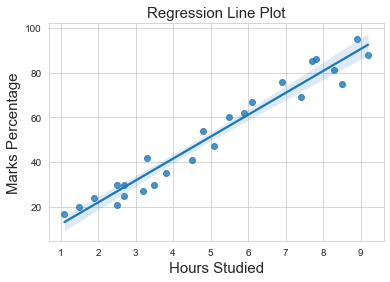

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [25]:
sns.regplot(x= df['Hours'], y= df['Scores'])
plt.title('Regression Line Plot',size=15)
plt.ylabel('Marks Percentage', size=15)
plt.xlabel('Hours Studied', size=15)
plt.show()
print(df.corr())

#### Train and Test Split

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
# Defining X and y from the Data
x = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values

x_train, x_test, y_train, y_test = train_test_split(x,y)

In [28]:
print(y.shape, y_train.shape, y_test.shape)

(25,) (18,) (7,)


### Linear Regression

In [29]:
#import Logistic Regression from sklearn
from sklearn.linear_model import LinearRegression

In [30]:
classifier = LinearRegression() # loadind the linear regression model to the variable 'classifier'

In [31]:
classifier.fit?

In [32]:
# training the model on training data
classifier.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Evalution of model

In [33]:
#import accuracy score
from sklearn.metrics import mean_absolute_error

In [34]:

prediction_on_training_data = classifier.predict(x_test)
prediction = pd.DataFrame({'Hours': [i[0] for i in x_test], 'Predicted Marks': [k for k in prediction_on_training_data]})
prediction

,Hours,Predicted Marks
0,3.2,34.488237
1,6.1,61.971002
2,8.3,82.819997
3,2.7,29.749829
4,1.9,22.168377
5,7.7,77.133907
6,3.8,40.174327


In [35]:
compare_scores = pd.DataFrame({'Actual Marks': y_test, 'Predicted Marks': prediction_on_training_data})
compare_scores

,Actual Marks,Predicted Marks
0,27,34.488237
1,67,61.971002
2,81,82.819997
3,25,29.749829
4,24,22.168377
5,85,77.133907
6,35,40.174327


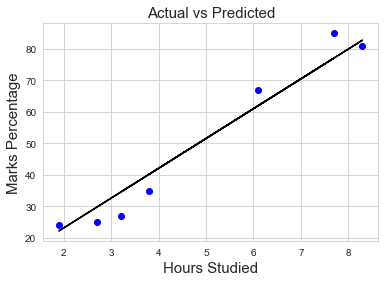

In [36]:
plt.scatter(x=x_test, y=y_test, color='blue')
plt.plot(x_test, prediction_on_training_data, color='Black')
plt.title('Actual vs Predicted', size=15)
plt.ylabel('Marks Percentage', size=15)
plt.xlabel('Hours Studied', size=15)
plt.show()

In [37]:
# Calculating the accuracy of the model
print('Mean absolute error: ',mean_absolute_error(y_test,prediction_on_training_data))

Mean absolute error:  4.8513004366836565


In [38]:
hours = [9.25]
prediction_on_test_data = classifier.predict([hours])
print("Score = {}".format(round(prediction_on_test_data[0],3)))

Score = 91.823
